In [1]:
#Problem 1
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from pyDOE import *


def compute_y(x):
    return np.cos(np.pi*x[0])*np.cos(np.pi*x[1])

def add_layer(inputs, in_size, out_size, activation_function=None):
    # add one more layer and return the output of this layer
    Weights = tf.Variable(1/np.sqrt((in_size + out_size) / 2.)*tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]))
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

def train_model(N):
    M = 100
    x1 = 4*lhs(1, samples=N) + 50
    x2 = 4*lhs(1, samples=N) + 50
    x3 = np.linspace(50, 54, M)
    x4 = np.linspace(50, 54, M)

    x_data = []
    for i in range(N):
        for j in range(N):
            x_data.append([x1[i],x2[j]])
    x_data = np.array(x_data) 
    x_data = np.reshape(x_data, (x_data.shape[0], x_data.shape[1]))
    #print(np.shape(x_data))

    y_data = np.zeros([np.square(N),1])
    for i in range(x_data.shape[0]):
        y_data[i] = compute_y(x_data[i])
    #print(np.shape(y_data))

    x_test = []
    for i in range(M):
        for j in range(M):
            x_test.append([x3[i],x4[j]])
    x_test = np.array(x_test) 
    #print(np.shape(x_test))

    y_true = np.zeros([np.square(M),1])
    for i in range(x_test.shape[0]):
        y_true[i] = compute_y(x_test[i])
    #print(np.shape(y_true))

    Xmean1 = x_data.mean(0)
    Xstd1 = x_data.std(0)
    Ymean1 = y_data.mean(0)
    Ystd1 = y_data.std(0)
    x_data = (x_data - Xmean1) / Xstd1
    y_data = (y_data - Ymean1) / Ystd1

    x_test = (x_test - Xmean1) / Xstd1
    y_true = (y_true - Ymean1) / Ystd1

    xs = tf.placeholder(tf.float32,[None,2])
    ys = tf.placeholder(tf.float32,[None,1])


    l1 = add_layer(xs, 2, 50, activation_function=tf.nn.tanh)
    l2 = add_layer(l1, 50, 50, activation_function=tf.nn.tanh)
    prediction = add_layer(l2, 50, 1, activation_function=None)

    loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction),reduction_indices=[1]))
    train_step = tf.train.AdamOptimizer(0.001).minimize(loss)

    epochs = 10000

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        #train section
        for i in range(epochs):
            sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
            if i % 2000 == 0:
            # to see the step improvement
                print(sess.run(loss, feed_dict={xs: x_data, ys: y_data}))
        prediction_value = sess.run(prediction, feed_dict={xs: x_test})

    x_data = Xstd1*x_data + Xmean1
    y_data = Ystd1*y_data + Ymean1

    x_test = Xstd1*x_test + Xmean1
    y_true = Ystd1*y_true + Ymean1

    prediction_value = Ystd1*prediction_value + Ymean1
    return x_data, y_data, x_test, y_true, prediction_value

In [2]:
x_data, y_data, x_test, y_true, prediction_value = train_model(N = 20)

1.0135581
0.0007633421
0.00015656662
0.000104416366
6.593101e-05


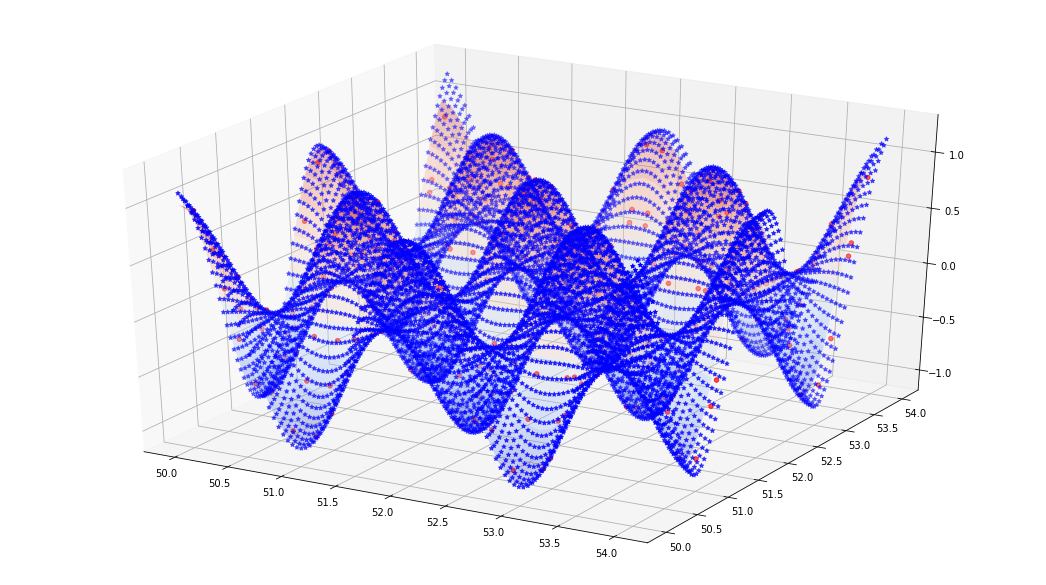

In [3]:
X = np.arange(50,54,0.1)
Y = np.arange(50,54,0.1)
X, Y = np.meshgrid(X, Y)
Z = compute_y([X,Y])

fig = plt.figure(1)  
fig.set_size_inches(18.5, 10.5)
ax = fig.add_subplot(1,1,1, projection='3d')
ax.scatter(x_data[:,0],x_data[:,1], y_data, c = 'red', marker='o') #red points are the training data
#ax.scatter(x_test[:,0],x_test[:,1], y_true, c = 'green', marker='^') #green points are the true data
ax.scatter(x_test[:,0],x_test[:,1], prediction_value, c = 'blue', marker='*') #blue points are the predicted data
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,linewidth=0,alpha=0.3)
plt.show()


1.06468
0.00046850852
3.2188775e-05
7.648534e-06
8.291484e-05
1.0459828
0.0031103133
0.00045592795
0.00019335166
0.000104460836
1.0048871
0.00084931485
0.00018720873
0.0001077831
7.803259e-05
1.2212286
0.0028669527
0.00028347687
0.0001355394
8.491387e-05
1.023067
0.0017223471
0.00017397875
8.04574e-05
7.950681e-05
1.0299331
0.0011823406
0.00018764252
9.9435034e-05
6.600429e-05
1.0572977
0.0021279303
0.00023769865
0.0004599069
0.0001087687
1.0611427
0.0012445842
0.00027493556
0.00010530384
7.292178e-05
1.0820565
0.0061939773
0.0004617846
0.00022248398
0.0001336903
1.0547526
0.0029232227
0.00038695618
0.00017743206
0.00011376684


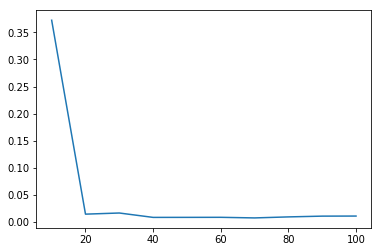

In [4]:
N = np.linspace(10, 100, 10, dtype = np.int32)
Loss = np.zeros_like(N) * 1.0
for i in range(N.shape[0]):
    x_data, y_data, x_test, y_true, prediction_value = train_model(N = N[i])
    Loss[i] = np.linalg.norm(prediction_value - y_true, 2)/ np.linalg.norm(y_true, 2)
    
fig = plt.figure(2)
plt.plot(N, Loss)
plt.show()

In [13]:
#Problem 2

In [50]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from pyDOE import *

def train_model2(Nf):
    
    def xavier_init(size):
        in_dim = size[0]
        out_dim = size[1]        
        xavier_stddev = np.sqrt(2/(in_dim + out_dim))
        return tf.Variable(tf.truncated_normal([in_dim, out_dim], stddev=xavier_stddev), dtype=tf.float32)
    
    def initialize_NN(layers):        
        weights = []
        biases = []
        num_layers = len(layers) 
        for l in range(0,num_layers-1):
            W = xavier_init(size=[layers[l], layers[l+1]])
            b = tf.Variable(tf.zeros([1,layers[l+1]], dtype=tf.float32), dtype=tf.float32)
            weights.append(W)
            biases.append(b)        
        return weights, biases
        
    def neural_net(X, weights, biases):
        num_layers = len(weights) + 1
        H = X
        for l in range(0,num_layers-2):
            W = weights[l]
            b = biases[l]
            H = tf.tanh(tf.add(tf.matmul(H, W), b))
        W = weights[-1]
        b = biases[-1]
        Y = tf.add(tf.matmul(H, W), b)
        return Y
    
    def net_u(x, weights, biases):
        u = neural_net(x, weights, biases)
        return u
    
    def net_f(x, weights, biases):
        u = net_u(x, weights, biases)
        u_x = tf.gradients(u, x)[0]
        u_xx = tf.gradients(u_x, x)[0]
        f = u_xx - u + (np.pi**2 + 1) * tf.sin(np.pi * x)
        return f
    
    x_data1 = lhs(1, samples=Nf)
    x_data1 = (x_data1 - 0.5)*2.
    x_data2 = np.zeros((2,1))
    x_data2[0] = -1.0
    x_data2[1] = 1.0
    layers = [1, 50, 50, 1]
    
    weights, biases = initialize_NN(layers)
    xs_u = tf.placeholder(tf.float32,[None,1])
    xs_f = tf.placeholder(tf.float32,[None,1])

    y_u = net_u(xs_u, weights, biases)
    y_f = net_f(xs_f, weights, biases)

    loss_u = tf.reduce_mean(tf.square(y_u))
    loss_f = tf.reduce_mean(tf.square(y_f))
    loss = loss_u + loss_f
    train_step =  tf.train.AdamOptimizer(0.001).minimize(loss)

            
    epochs = 5000

    #train section
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for i in range(epochs):
            sess.run(train_step, feed_dict={xs_f: x_data1, xs_u: x_data2})
            if i % 1000 == 0:
                loss_uu, loss_ff = sess.run([loss_u, loss_f], feed_dict={xs_f: x_data1, xs_u: x_data2})
        x_test = np.linspace(-1, 1, 100)[:,None]
        prediction_value = sess.run(y_u, feed_dict={xs_u: x_test})

    y_test = np.sin(np.pi * x_test)
    return x_test, y_test, prediction_value


In [51]:
x_test, y_test, prediction_value = train_model2(Nf = 50)

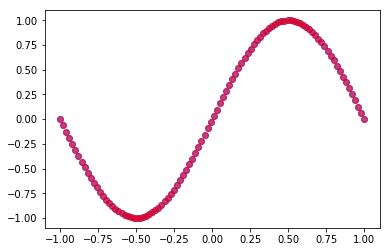

In [52]:
plt.figure(2) 
plt.plot(x_test, y_test, 'bo', alpha = 0.5)
plt.plot(x_test, prediction_value, 'ro', alpha = 0.5)
plt.show()

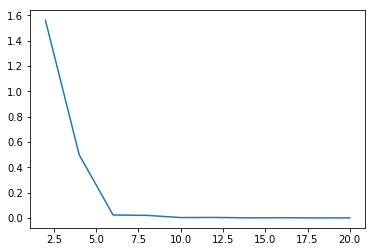

In [55]:
N = np.linspace(2, 20, 10, dtype = np.int32)
Loss = np.zeros_like(N) * 1.0
for i in range(N.shape[0]):
    x_test, y_test, prediction_value = train_model2(N[i])
    Loss[i] = np.linalg.norm(prediction_value - y_test, 2)/ np.linalg.norm(y_test, 2)
    
fig = plt.figure(2)
plt.plot(N, Loss)
plt.show()

In [92]:
#Problem 3
import pandas as pd
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from pyDOE import *

def train_model3(layers = [12, 50, 50, 1]):
    
    def xavier_init(size):
        in_dim = size[0]
        out_dim = size[1]        
        xavier_stddev = np.sqrt(2/(in_dim + out_dim))
        return tf.Variable(tf.truncated_normal([in_dim, out_dim], stddev=xavier_stddev), dtype=tf.float32)
    
    def initialize_NN(layers):        
        weights = []
        biases = []
        num_layers = len(layers) 
        for l in range(0,num_layers-1):
            W = xavier_init(size=[layers[l], layers[l+1]])
            b = tf.Variable(tf.zeros([1,layers[l+1]], dtype=tf.float32), dtype=tf.float32)
            weights.append(W)
            biases.append(b)        
        return weights, biases
        
    def neural_net(X, weights, biases):
        num_layers = len(weights) + 1
        H = X
        for l in range(0,num_layers-2):
            W = weights[l]
            b = biases[l]
            H = tf.nn.relu(tf.add(tf.matmul(H, W), b))
        W = weights[-1]
        b = biases[-1]
        Y = tf.add(tf.matmul(H, W), b)
        return Y
    
    def net_u(x, weights, biases):
        u = neural_net(x, weights, biases)
        return u

    def fetch_minibatch(X, y, N_batch):
        N = y.shape[0]
        idx = np.random.permutation(N)[0: N_batch]
        Y_batch = y[idx,:]
        X_batch = X[idx,:]
        return Y_batch, X_batch
    
    def sigmoid(x):
        return 1 / (1 + tf.exp(-x))
    
    data = pd.read_csv('Data.csv') 
    data = np.asarray(data)

    X = data[:,0:12]
    Y = data[:,13:14]
    y = np.zeros((Y.shape[0], 1))
    for i in range(Y.shape[0]):
        if Y[i] == 'unstable':
            y[i] = 0
        else:
            y[i] = 1

    y = np.float32(y)
    X = np.float32(X)
    N_batch = 32
    
    idx = np.random.permutation(data.shape[0])
    idx_train = idx[0:7000]
    idx_test = idx[7000:data.shape[0]]

    y_train = y[idx_train,:]
    X_train = X[idx_train,:]
    y_test = y[idx_test,:]
    X_test = X[idx_test,:]    
    
    weights, biases = initialize_NN(layers)
    xs = tf.placeholder(tf.float32,[None,12])
    ys = tf.placeholder(tf.float32,[None,1])

    prob = sigmoid(net_u(xs, weights, biases))
    
    loss = - tf.reduce_mean(ys * tf.log(prob + 1e-8) + (1 - ys) * tf.log(1 - prob +1e-8))
    train_step =  tf.train.AdamOptimizer(0.001).minimize(loss)

            
    epochs = 20000

    #train section
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for i in range(epochs):
            y_batch, X_batch = fetch_minibatch(X_train, y_train, N_batch)
            sess.run(train_step, feed_dict={xs: X_batch, ys: y_batch})
#            if i % 2000 == 0:
#                print(sess.run(loss, feed_dict={xs: X_test, ys: y_test}))
        y_prob = sess.run(prob, feed_dict={xs: X_test, ys: y_test})

    yy = np.zeros((y_prob.shape[0], 1))
    for i in range(y_prob.shape[0]):
        if y_prob[i] >= 0.5:
            yy[i] = 1
        else:
            yy[i] = 0

    y_test = np.int32(y_test)
    yy = np.int32(yy)
    return y_test, yy, y_prob


In [93]:
y_test, yy, y_prob = train_model3(layers = [12, 50, 50, 1])
Matrix = confusion_matrix(y_test, yy)
print(Matrix)
print(np.sum(np.abs(y_test - yy)))
print(1 - np.sum(np.abs(y_test - yy))/y_test.shape[0])

[[1824   77]
 [  74 1025]]
151
0.9496666666666667


In [94]:
y_test, yy, y_prob = train_model3(layers = [12, 1])
Matrix = confusion_matrix(y_test, yy)
print(Matrix)
print(np.sum(np.abs(y_test - yy)))
print(1 - np.sum(np.abs(y_test - yy))/y_test.shape[0])

[[1719  182]
 [ 428  671]]
610
0.7966666666666666


In [95]:
y_test, yy, y_prob = train_model3(layers = [12, 20, 1])
Matrix = confusion_matrix(y_test, yy)
print(Matrix)
print(np.sum(np.abs(y_test - yy)))
print(1 - np.sum(np.abs(y_test - yy))/y_test.shape[0])

y_test, yy, y_prob = train_model3(layers = [12, 50, 1])
Matrix = confusion_matrix(y_test, yy)
print(Matrix)
print(np.sum(np.abs(y_test - yy)))
print(1 - np.sum(np.abs(y_test - yy))/y_test.shape[0])

y_test, yy, y_prob = train_model3(layers = [12, 100, 1])
Matrix = confusion_matrix(y_test, yy)
print(Matrix)
print(np.sum(np.abs(y_test - yy)))
print(1 - np.sum(np.abs(y_test - yy))/y_test.shape[0])

[[1842   79]
 [ 168  911]]
247
0.9176666666666666
[[1810   95]
 [  61 1034]]
156
0.948
[[1789  162]
 [  14 1035]]
176
0.9413333333333334


In [96]:
y_test, yy, y_prob = train_model3(layers = [12, 20, 20, 1])
Matrix = confusion_matrix(y_test, yy)
print(Matrix)
print(np.sum(np.abs(y_test - yy)))
print(1 - np.sum(np.abs(y_test - yy))/y_test.shape[0])

y_test, yy, y_prob = train_model3(layers = [12, 50, 50, 1])
Matrix = confusion_matrix(y_test, yy)
print(Matrix)
print(np.sum(np.abs(y_test - yy)))
print(1 - np.sum(np.abs(y_test - yy))/y_test.shape[0])

y_test, yy, y_prob = train_model3(layers = [12, 100, 100, 1])
Matrix = confusion_matrix(y_test, yy)
print(Matrix)
print(np.sum(np.abs(y_test - yy)))
print(1 - np.sum(np.abs(y_test - yy))/y_test.shape[0])

[[1806  111]
 [  53 1030]]
164
0.9453333333333334
[[1900   27]
 [ 140  933]]
167
0.9443333333333334
[[1858   22]
 [ 149  971]]
171
0.943


In [97]:
y_test, yy, y_prob = train_model3(layers = [12, 20, 20, 20, 1])
Matrix = confusion_matrix(y_test, yy)
print(Matrix)
print(np.sum(np.abs(y_test - yy)))
print(1 - np.sum(np.abs(y_test - yy))/y_test.shape[0])

y_test, yy, y_prob = train_model3(layers = [12, 50, 50, 50, 1])
Matrix = confusion_matrix(y_test, yy)
print(Matrix)
print(np.sum(np.abs(y_test - yy)))
print(1 - np.sum(np.abs(y_test - yy))/y_test.shape[0])

y_test, yy, y_prob = train_model3(layers = [12, 100, 100, 100, 1])
Matrix = confusion_matrix(y_test, yy)
print(Matrix)
print(np.sum(np.abs(y_test - yy)))
print(1 - np.sum(np.abs(y_test - yy))/y_test.shape[0])

[[1847   54]
 [ 125  974]]
179
0.9403333333333334
[[1782   88]
 [  46 1084]]
134
0.9553333333333334
[[1868   58]
 [  74 1000]]
132
0.956


$$
\begin{table}
\begin{tabular}{|c|c|c|c|c|c|c|c|c|c|}
\hline
\diagbox{$N_u$}{$N_r$} & 10& 100& 250& 500& 1000& 5000& 10000\\ 
\hline
60  & 9.3e-01& 5.6e-01& 4.8e-01& 5.0e-02& 1.9e-01& 5.0e-02& 5.1e-02\\
\hline
90  & 5.8e-01& 5.3e-01& 3.5e-01& 1.5e-01& 4.9e-02& 1.0e-01& 5.8e-02\\
\hline
150 & 6.7e-01& 1.4e-01& 3.0e-01& 3.6e-02& 4.9e-02& 1.2e-01& 4.7e-02\\
\hline
\end{tabular}
\caption{Relative $\mathcal{L}_2$ prediction error for different number of training and collocation points $N_u$ and $N_r$, respectively.}
\label{tab:sens_t2}
\end{table}
$$

|XXX  | 0 | 1 |2|3|
|------|------|------|------|------|
|   20  | 0.796 | 0.918 |0.945|0.940|
|   50  | 0.796 | 0.948 |0.944|0.955|
|   100  | 0.796 | 0.941 |0.943|0.956|